#RF Section

## RF Default 10 years MAE -

In [ ]:
#Import necessary libraries
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Download the historical stock data for the past 10 years
data = yf.download('TSLA', start='2013-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,2.333333,2.363333,2.314000,2.357333,2.357333,17922000
2013-01-03,2.345333,2.363333,2.316667,2.318000,2.318000,11130000
2013-01-04,2.320000,2.320000,2.261333,2.293333,2.293333,10110000
2013-01-07,2.320000,2.320000,2.260000,2.289333,2.289333,6630000
2013-01-08,2.300000,2.300000,2.207333,2.245333,2.245333,19260000


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300
2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300


In [ ]:
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  2518.000000  2518.000000  2518.000000  2518.000000  2518.000000   
mean     73.168104    74.804530    71.355799    73.102271    73.102271   
std     102.115086   104.464983    99.452438   101.969056   101.969056   
min       2.205333     2.225333     2.140667     2.194000     2.194000   
25%      14.523499    14.765333    14.285333    14.544000    14.544000   
50%      18.900333    19.239333    18.574666    18.954333    18.954333   
75%      79.123999    80.322168    77.288334    79.093498    79.093498   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  2.518000e+03  
mean   1.120962e+08  
std    8.078159e+07  
min    6.603000e+06  
25%    6.290422e+07  
50%    8.918415e+07  
75%    1.311840e+08  
max    9.140820e+08  


In [ ]:
data = data.drop('Adj Close', axis=1)

In [ ]:
print(data.describe())

              Open         High          Low        Close        Volume
count  2518.000000  2518.000000  2518.000000  2518.000000  2.518000e+03
mean     73.168104    74.804530    71.355799    73.102271  1.120962e+08
std     102.115086   104.464983    99.452438   101.969056  8.078159e+07
min       2.205333     2.225333     2.140667     2.194000  6.603000e+06
25%      14.523499    14.765333    14.285333    14.544000  6.290422e+07
50%      18.900333    19.239333    18.574666    18.954333  8.918415e+07
75%      79.123999    80.322168    77.288334    79.093498  1.311840e+08
max     411.470001   414.496674   405.666656   409.970001  9.140820e+08


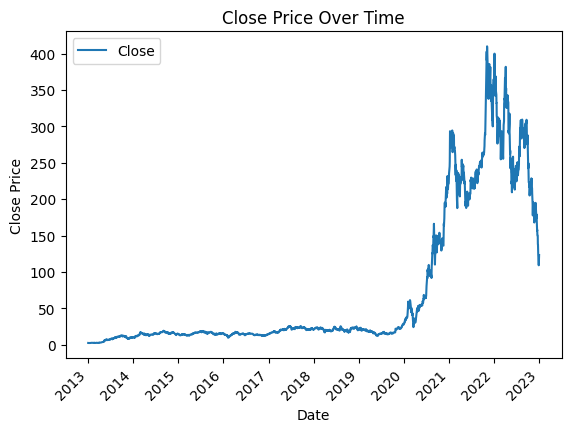

In [ ]:
# Plot the 'Close' price
data.plot(y='Close', use_index=True)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.show()

In [ ]:
# Data preprocess

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close'] #Target feature

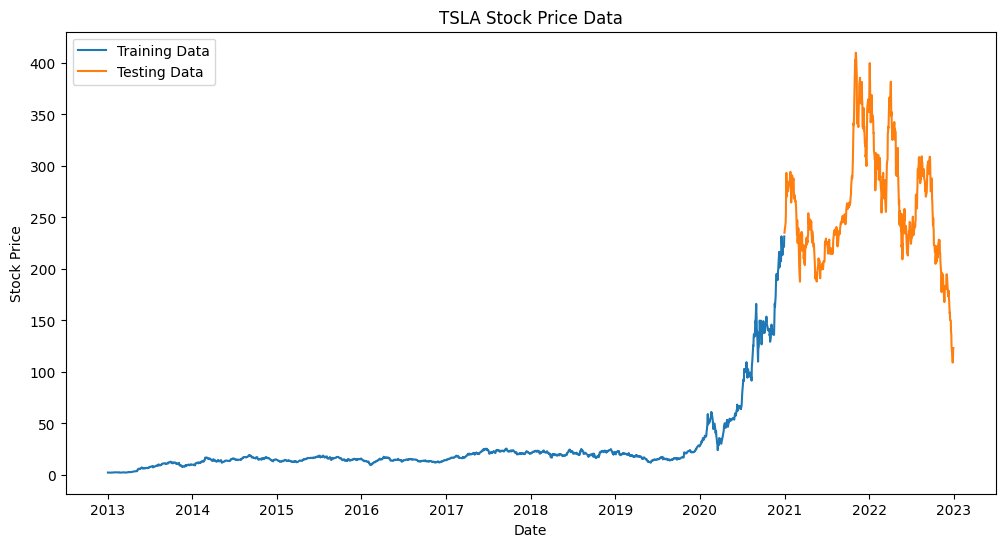

In [ ]:
# Split the data into training and testing sets 80/20
train_data = data.iloc[:int(len(data)*0.8)]
test_data = data.iloc[int(len(data)*0.8):]

# Visualise the training and testing data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(test_data.index, test_data['Close'], label='Testing Data')
plt.title('TSLA Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Checking date range for training data
print("Training data date range:")
print(train_data.index.min(), "to", train_data.index.max())

# Checking date range for testing data
print("\nTesting data date range:")
print(test_data.index.min(), "to", test_data.index.max())

Training data date range:
2013-01-02 00:00:00 to 2020-12-30 00:00:00

Testing data date range:
2020-12-31 00:00:00 to 2022-12-30 00:00:00


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
predictions = rf.predict(X_test)
print('The model score is:' , rf.score(X, y))

The model score is: 0.9998136632806757


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, predictions)

In [ ]:
print("Mean Squared Error (MSE): {:.2f}".format(MSE))
print("Root Mean Squared Error (RMSE): {:.2f}".format(RMSE))
print("Mean Absolute Error (MAE): {:.2f}".format(MAE))
print("R² Score:", r2)

Mean Squared Error (MSE): 6.18
Root Mean Squared Error (RMSE): 2.49
Mean Absolute Error (MAE): 1.06
R² Score: 0.999378392108815


## RF Default 5 years MAE -

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Download the historical stock data for the past 5 years
data = yf.download('TSLA', start='2018-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500
2022-12-29,120.389999,123.570000,117.500000,121.820000,121.820000,221923300
2022-12-30,119.949997,124.480003,119.750000,123.180000,123.180000,157777300


In [ ]:
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean    131.914480   134.953362   128.540340   131.784972   131.784972   
std     118.024908   120.693717   114.974179   117.835854   117.835854   
min      12.073333    12.445333    11.799333    11.931333    11.931333   
25%      21.060000    21.476001    20.643000    21.078333    21.078333   
50%      81.431999    81.866669    79.040001    80.577332    80.577332   
75%     235.556671   239.885002   231.284996   236.125000   236.125000   
max     411.470001   414.496674   405.666656   409.970001   409.970001   

             Volume  
count  1.259000e+03  
mean   1.324330e+08  
std    9.017629e+07  
min    2.940180e+07  
25%    7.578000e+07  
50%    1.016115e+08  
75%    1.543911e+08  
max    9.140820e+08  


In [ ]:
data = data.drop('Adj Close', axis=1)

In [ ]:
print(data.describe())

              Open         High          Low        Close        Volume
count  1259.000000  1259.000000  1259.000000  1259.000000  1.259000e+03
mean    131.914480   134.953362   128.540340   131.784972  1.324330e+08
std     118.024908   120.693717   114.974179   117.835854  9.017629e+07
min      12.073333    12.445333    11.799333    11.931333  2.940180e+07
25%      21.060000    21.476001    20.643000    21.078333  7.578000e+07
50%      81.431999    81.866669    79.040001    80.577332  1.016115e+08
75%     235.556671   239.885002   231.284996   236.125000  1.543911e+08
max     411.470001   414.496674   405.666656   409.970001  9.140820e+08


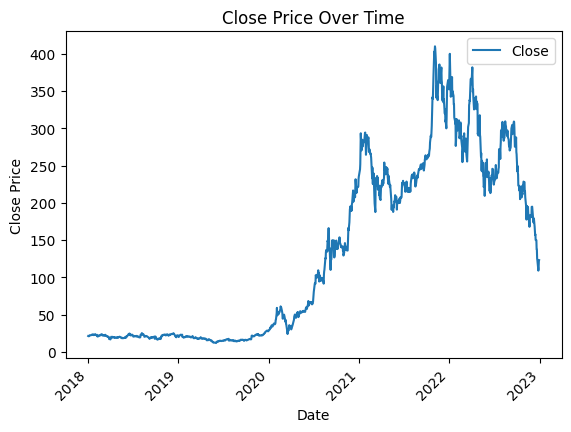

In [ ]:
# Plot the 'Close' price
data.plot(y='Close', use_index=True)

plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.show()

In [ ]:
# Data preprocess

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close'] #Target feature

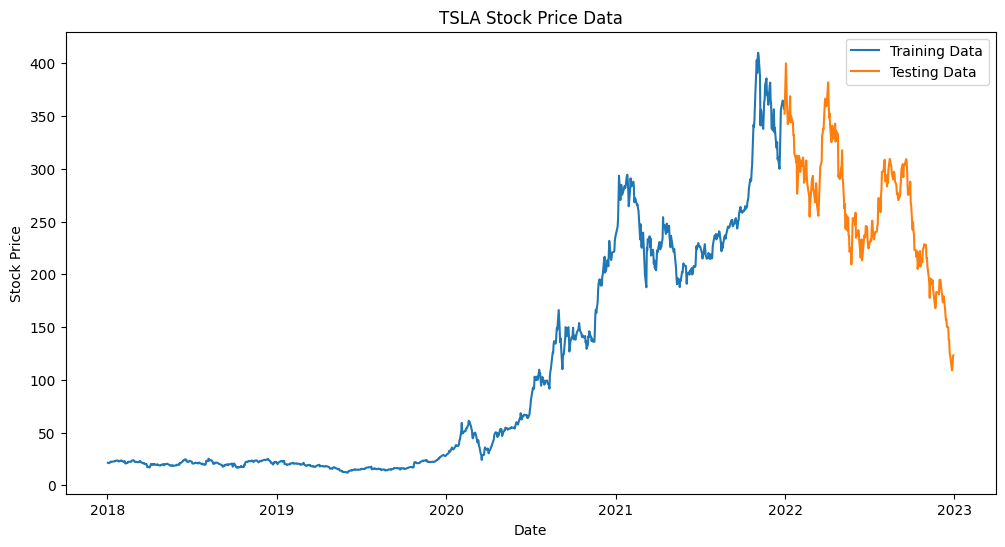

In [ ]:
# Split the data into training and testing sets
train_data = data.iloc[:int(len(data)*0.8)]
test_data = data.iloc[int(len(data)*0.8):]

# Create a graph to visualise the training and testing data
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Close'], label='Training Data')
plt.plot(test_data.index, test_data['Close'], label='Testing Data')
plt.title('TSLA Stock Price Data')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
# Checking date range for training data
print("Training data date range:")
print(train_data.index.min(), "to", train_data.index.max())

# Checking date range for testing data
print("\nTesting data date range:")
print(test_data.index.min(), "to", test_data.index.max())

Training data date range:
2018-01-02 00:00:00 to 2021-12-30 00:00:00

Testing data date range:
2021-12-31 00:00:00 to 2022-12-30 00:00:00


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
predictions = rf.predict(X_test)
print('The model score is:' , rf.score(X, y))

The model score is: 0.9997493667391374


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate R² score
r2 = r2_score(y_test, predictions)
# Calculate evaluation metrics
MAE = mean_absolute_error(y_test, predictions)
MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(MSE)

In [ ]:
print("Mean Absolute Error (MAE): {:.2f}".format(MAE))
print("Mean Squared Error (MSE): {:.2f}".format(MSE))
print("Root Mean Squared Error (RMSE): {:.2f}".format(RMSE))
print("R² Score:", r2)

Mean Absolute Error (MAE): 1.86
Mean Squared Error (MSE): 9.40
Root Mean Squared Error (RMSE): 3.07
R² Score: 0.9993068333012644


## RF Feature Engineering  MAE -

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import make_scorer
from sklearn.preprocessing import FunctionTransformer

# Download data
data = yf.download('TSLA', start='2016-01-01', end='2023-01-01') # 7 years

# Feature engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up / ema_down
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged features
for i in range(1, 6):  # Create 5 lagged features
    data[f'Lagged_Close_{i}'] = data['Close'].shift(i)

data = data.dropna()

In [ ]:
# Prepare data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
          'Lagged_Close_1', 'Lagged_Close_2', 'Lagged_Close_3', 'Lagged_Close_4', 'Lagged_Close_5']]
y = data['Close']

# Split data into training/validation/testing sets (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# Create and fit the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions and evaluations
for dataset_name, X_data, y_data in [('Validation', X_val, y_val), ('Test', X_test, y_test)]:
    y_pred = model.predict(X_data)

    mae = mean_absolute_error(y_data, y_pred)
    mse = mean_squared_error(y_data, y_pred)
    rmse = mean_squared_error(y_data, y_pred, squared=False)
    r2 = r2_score(y_data, y_pred)

    print(f"\n{dataset_name} Set Metrics:")
    print("-" * 40)
    print(f"{'Mean Absolute Error (MAE)':<35}: {mae:.4f}")
    print(f"{'Mean Squared Error (MSE)':<35}: {mse:.4f}")
    print(f"{'Root Mean Squared Error (RMSE)':<35}: {rmse:.4f}")
    print(f"{'R-squared (R2)':<35}: {r2:.4f}")

[*********************100%***********************]  1 of 1 completed



Validation Set Metrics:
----------------------------------------
Mean Absolute Error (MAE)          : 1.9179
Mean Squared Error (MSE)           : 11.6567
Root Mean Squared Error (RMSE)     : 3.4142
R-squared (R2)                     : 0.9991

Test Set Metrics:
----------------------------------------
Mean Absolute Error (MAE)          : 1.7188
Mean Squared Error (MSE)           : 11.8923
Root Mean Squared Error (RMSE)     : 3.4485
R-squared (R2)                     : 0.9991


## RF Hypertuning - MAE -

K-fold cross vaildation/ Regularization / Ensemble method - bagging

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Download historical stock data for Tesla (TSLA) for 2018-2023
data = yf.download('TSLA', start='2018-01-01', end='2023-01-01')

# Prepare data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Split the data into 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [2, 4, 6],
}

# Initialise K-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_index, val_index in kf.split(X_train):
    X_tr, X_val = X_train.iloc[train_index], X_train.iloc[val_index]
    y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

    # Random Forest Regressor model
    rf = RandomForestRegressor(random_state=42, max_depth=10, min_samples_split=10, min_samples_leaf=4)

    # Perform Grid Search Cross-Validation to find the best hyperparameters
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)
    grid_search.fit(X_tr, y_tr)

    best_rf = grid_search.best_estimator_
    y_pred = best_rf.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f"Mean Squared Error (MSE) for this fold: {mse:.2f}")

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Squared Error (MSE) for this fold: 10.61
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Squared Error (MSE) for this fold: 15.08
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Squared Error (MSE) for this fold: 11.95
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Squared Error (MSE) for this fold: 16.39
Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mean Squared Error (MSE) for this fold: 23.59
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("R² Score:", r2)


Mean Absolute Error (MAE): 1.90
Mean Squared Error (MSE): 9.67
Root Mean Squared Error (RMSE): 3.11
R² Score: 0.9992870850046568


## RF Combine 1 - MAE

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Download historical stock data for Tesla (TSLA) for the past 5 years
data = yf.download('TSLA', start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Volatility Measures - Standard Deviation
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Momentum Indicators - Relative Strength Index (RSI)
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = compute_rsi(data)

# Lag Features - Using lagged closing prices
for t in range(1, 6):
    data[f'lag_{t}'] = data['Close'].shift(t)  # Creating lagged features for 1 to 5 days

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'Volatility_30d', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']].dropna()
y = data['Close']  # Target variable

[*********************100%***********************]  1 of 1 completed


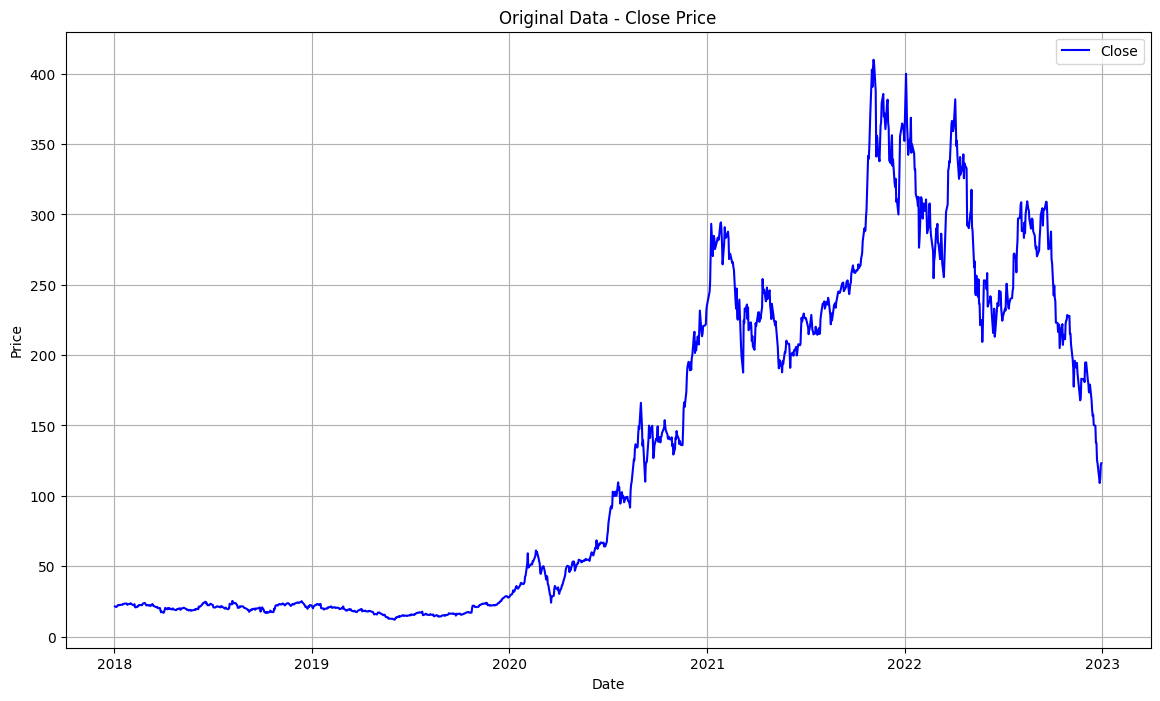

In [ ]:
import matplotlib.pyplot as plt

# Create a line chart with the original 'Close' data
plt.figure(figsize=(14, 8))
plt.plot(data['Close'], label='Close', color='b')
plt.title('Original Data - Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

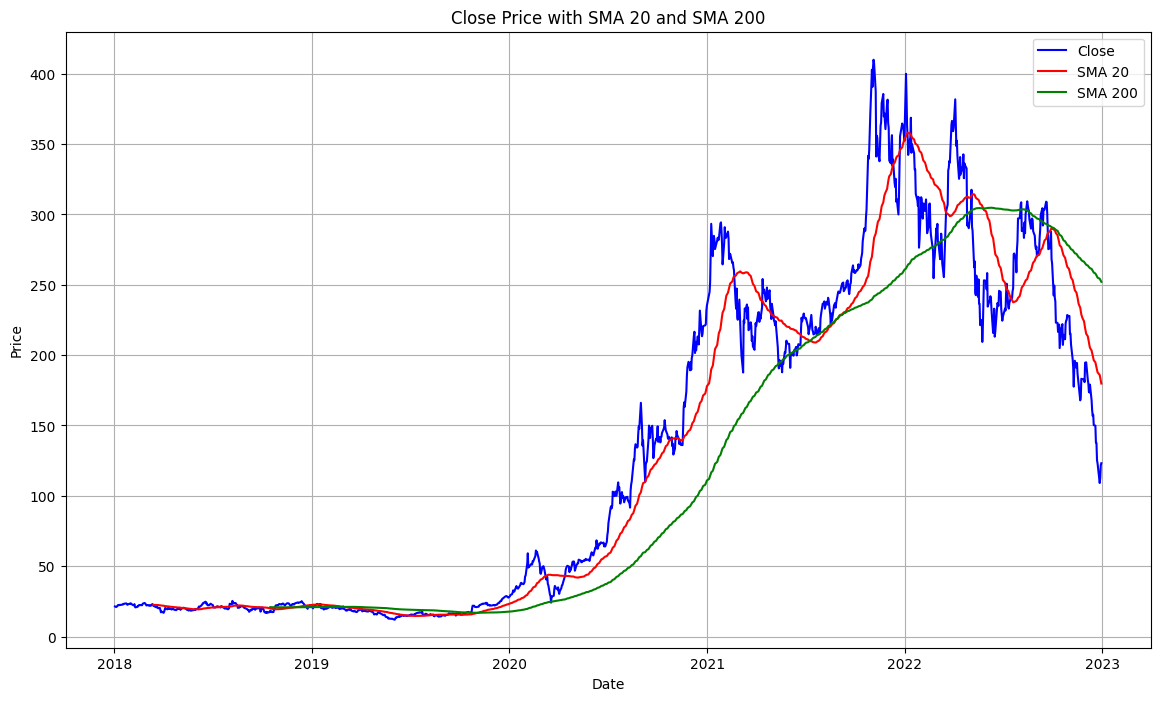

In [ ]:
# Create a line chart with SMA 50 and SMA 200 overlaid
plt.figure(figsize=(14, 8))
plt.plot(data['Close'], label='Close', color='b')
plt.plot(data['SMA_20'], label='SMA 20', color='r')
plt.plot(data['SMA_200'], label='SMA 200', color='g')
plt.title('Close Price with SMA 20 and SMA 200')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

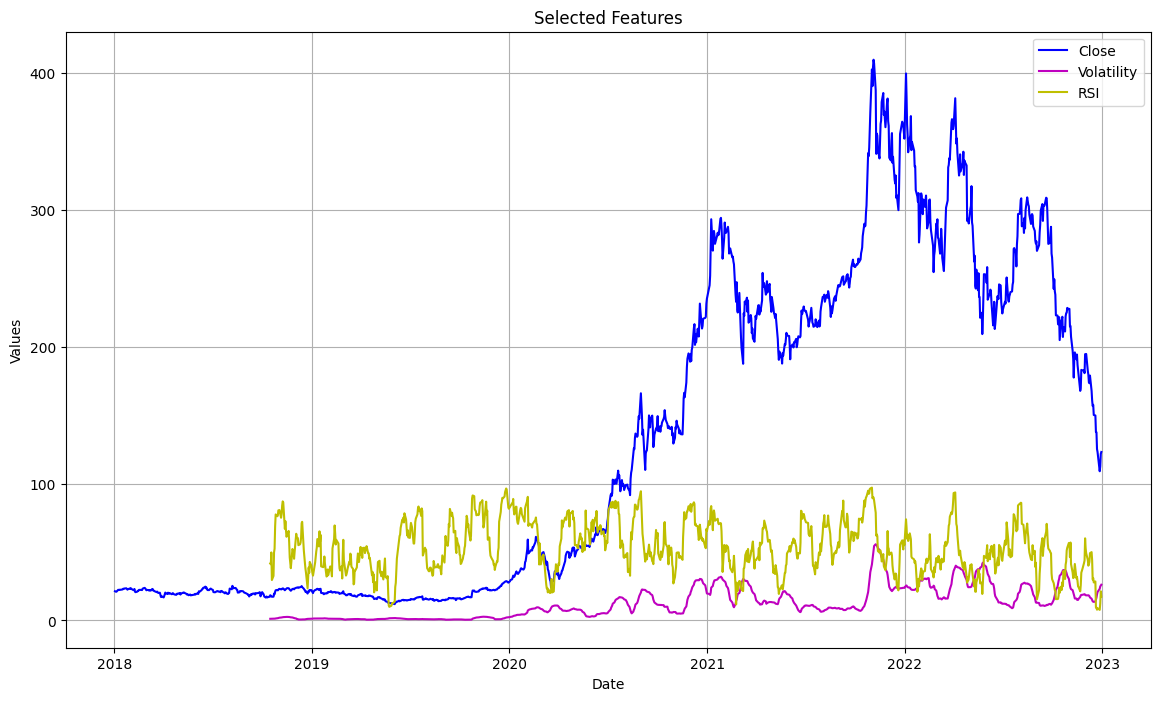

In [ ]:
import matplotlib.pyplot as plt

# Create a line chart for the selected features
plt.figure(figsize=(14, 8))

plt.plot(data['Close'], label='Close', color='b')
plt.plot(X.index, X['Volatility_30d'], label='Volatility', color='m')
plt.plot(X.index, X['RSI'], label='RSI', color='y')

plt.title('Selected Features')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import pandas as pd

# Concatenate the selected features into a single DataFrame
selected_features = X[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]

# Print the DataFrame to display the values side by side
print(selected_features.head())

                lag_1      lag_2      lag_3      lag_4      lag_5
Date                                                             
2018-10-16  17.306000  17.252001  16.815332  17.125334  17.520000
2018-10-17  18.439333  17.306000  17.252001  16.815332  17.125334
2018-10-18  18.118668  18.439333  17.306000  17.252001  16.815332
2018-10-19  17.594000  18.118668  18.439333  17.306000  17.252001
2018-10-22  17.333332  17.594000  18.118668  18.439333  17.306000


In [ ]:
# Drop missing values from both X and y
data_cleaned = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'Volatility_30d', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'Close']].dropna()

# Split the data into features (X) and target variable (y)
X = data_cleaned[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'Volatility_30d', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data_cleaned['Close']

In [ ]:
# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/(0.85), shuffle=False)

# Create a pipeline to handle missing values and model training
pipeline = make_pipeline(SimpleImputer(strategy='mean'), RandomForestRegressor(random_state=42))

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_features': ['sqrt', 'log2', None],
    'randomforestregressor__max_depth': [None, 10, 20, 30],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

# Initialise GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2,
                           error_score='raise')  # Raise error for debugging

# Start timer for fitting the grid search
start_time = time.time()

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# End timer for fitting the grid search
end_time = time.time()

# Calculate duration
fit_duration = end_time - start_time
print(f"Time taken for GridSearchCV fitting: {fit_duration:.2f} seconds")

# Retrieve the best pipeline with the best parameters
best_pipeline = grid_search.best_estimator_

# Make predictions on the validation set
y_val_pred = best_pipeline.predict(X_val)

Fitting 3 folds for each of 324 candidates, totalling 972 fits
Time taken for GridSearchCV fitting: 334.01 seconds


In [ ]:
# Evaluate the model on the validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"Validation Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Validation Root Mean Squared Error (RMSE): {val_rmse:.2f}")
print(f"Validation R-squared (R2): {val_r2:.2f}")

# Make predictions on the test set
y_test_pred = best_pipeline.predict(X_test)

# Evaluate the model on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Test R-squared (R2): {test_r2:.2f}")

# Print the best parameters found during tuning
print(f"\nBest parameters from GridSearchCV: {grid_search.best_params_}")

Validation Mean Absolute Error (MAE): 38.13
Validation Mean Squared Error (MSE): 2496.93
Validation Root Mean Squared Error (RMSE): 49.97
Validation R-squared (R2): -0.54

Test Mean Absolute Error (MAE): 6.86
Test Mean Squared Error (MSE): 78.46
Test Root Mean Squared Error (RMSE): 8.86
Test R-squared (R2): 0.97

Best parameters from GridSearchCV: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': None, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 100}


## RF Combine 2 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Download historical stock data for Tesla (TSLA) from 2016 to 2023
data = yf.download('TSLA', start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Momentum Indicators - Relative Strength Index (RSI)
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = compute_rsi(data)

# Lag Features for 1 to 5 days
for t in range(1, 6):
    data[f'lag_{t}'] = data['Close'].shift(t)

# Prepare the data by dropping rows with NA values
data_cleaned = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200',
                      'Volatility_30d', 'RSI', 'lag_1', 'lag_2', 'lag_3',
                      'lag_4', 'lag_5', 'Close']].dropna()

# Split features and target variable
X = data_cleaned[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200',
                   'Volatility_30d', 'RSI', 'lag_1', 'lag_2', 'lag_3',
                   'lag_4', 'lag_5']]
y = data_cleaned['Close']

In [ ]:
# Split the data into training, validation, and test sets (80/10/10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Create a Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Create a pipeline to handle missing values and the model
pipeline = make_pipeline(SimpleImputer(strategy='mean'), rf)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_features': [None, 'sqrt', 'log2'],
    'randomforestregressor__max_depth': [None, 10, 20, 30],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters
print(f"Best parameters found: {grid_search.best_params_}")

[*********************100%***********************]  1 of 1 completed


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found: {'randomforestregressor__max_depth': 10, 'randomforestregressor__max_features': None, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__n_estimators': 200}

Validation Mean Absolute Error (MAE): 38.68
Validation Mean Squared Error (MSE): 2514.61
Validation Root Mean Squared Error (RMSE): 50.15
Validation R-squared (R2): -0.58

Test Mean Absolute Error (MAE): 6.74
Test Mean Squared Error (MSE): 75.08
Test Root Mean Squared Error (RMSE): 8.67
Test R-squared (R2): 0.97


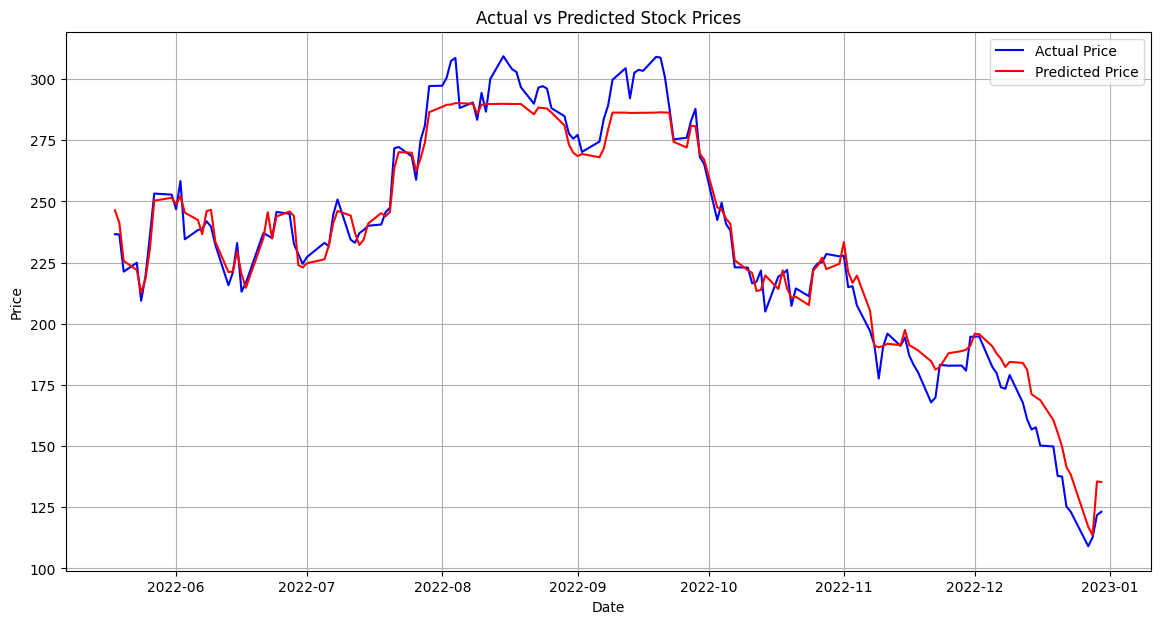

In [ ]:
# Best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the validation set
y_val_pred = best_model.predict(X_val)

# Evaluate the model on the validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_r2 = r2_score(y_val, y_val_pred)

print(f"\nValidation Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"Validation Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Validation Root Mean Squared Error (RMSE): {val_rmse:.2f}")
print(f"Validation R-squared (R2): {val_r2:.2f}")

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Test R-squared (R2): {test_r2:.2f}")

# Visualise the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price', color='b')
plt.plot(y_test.index, y_test_pred, label='Predicted Price', color='r')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## RF Combine 3 - MAE

In [ ]:
import time
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Start timer for data download
start_time = time.time()
# Download historical stock data for Tesla (TSLA) from 2016 to 2023
data = yf.download('TSLA', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()
# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Function to compute the Relative Strength Index
def compute_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate RSI
data['RSI'] = compute_rsi(data)

# Function to compute the Moving Average Convergence Divergence
def compute_macd(data, short_window=12, long_window=26):
    exp1 = data['Close'].ewm(span=short_window, adjust=False).mean()
    exp2 = data['Close'].ewm(span=long_window, adjust=False).mean()
    return exp1 - exp2

# Calculate MACD
data['MACD'] = compute_macd(data)

# Calculate Bollinger Bands
data['Bollinger_High'] = data['Close'].rolling(window=20).mean() + (data['Close'].rolling(window=20).std() * 2)
data['Bollinger_Low'] = data['Close'].rolling(window=20).mean() - (data['Close'].rolling(window=20).std() * 2)

# Creating lag features
for t in range(1, 6):
    data[f'lag_{t}'] = data['Close'].shift(t)

# Clean the data
data_cleaned = data[['Open', 'High', 'Low', 'Volume', 'SMA_50', 'SMA_200', 'Volatility_30d', 'RSI', 'MACD',
                      'Bollinger_High', 'Bollinger_Low', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'Close']].dropna()
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

# Prepare the feature set and target variable
X = data_cleaned[['Open', 'High', 'Low', 'Volume', 'SMA_50', 'SMA_200',
                   'Volatility_30d', 'RSI', 'MACD',
                   'Bollinger_High', 'Bollinger_Low',
                   'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data_cleaned['Close']

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.22 seconds
Time taken for feature engineering: 0.03 seconds


In [ ]:
# Start timer for data splitting
start_time = time.time()
# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

# Create a Random Forest Regressor model
rf = RandomForestRegressor(random_state=42)

# Create the pipeline
pipeline = make_pipeline(SimpleImputer(strategy='mean'), rf)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200, 300],
    'randomforestregressor__max_features': ['sqrt', 'log2', None],
    'randomforestregressor__max_depth': [None, 10, 20, 30, 40],
    'randomforestregressor__min_samples_split': [2, 5, 10],
    'randomforestregressor__min_samples_leaf': [1, 2, 4]
}

# Start timer for GridSearchCV fitting
start_time = time.time()
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=2, error_score='raise')
grid_search.fit(X_train, y_train)
print(f"Time taken for GridSearchCV fitting: {time.time() - start_time:.2f} seconds")

# Print best parameters
print(f"Best parameters found: {grid_search.best_params_}")

# Best model from grid search
best_model = grid_search.best_estimator_

Time taken for data splitting: 0.01 seconds
Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Time taken for GridSearchCV fitting: 3429.77 seconds
Best parameters found: {'randomforestregressor__max_depth': None, 'randomforestregressor__max_features': None, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 5, 'randomforestregressor__n_estimators': 200}



Validation Mean Absolute Error (MAE): 38.60
Validation Mean Squared Error (MSE): 2510.02
Validation Root Mean Squared Error (RMSE): 50.10
Validation R-squared (R2): -0.57

Test Mean Absolute Error (MAE): 6.92
Test Mean Squared Error (MSE): 80.69
Test Root Mean Squared Error (RMSE): 8.98
Test R-squared (R2): 0.97


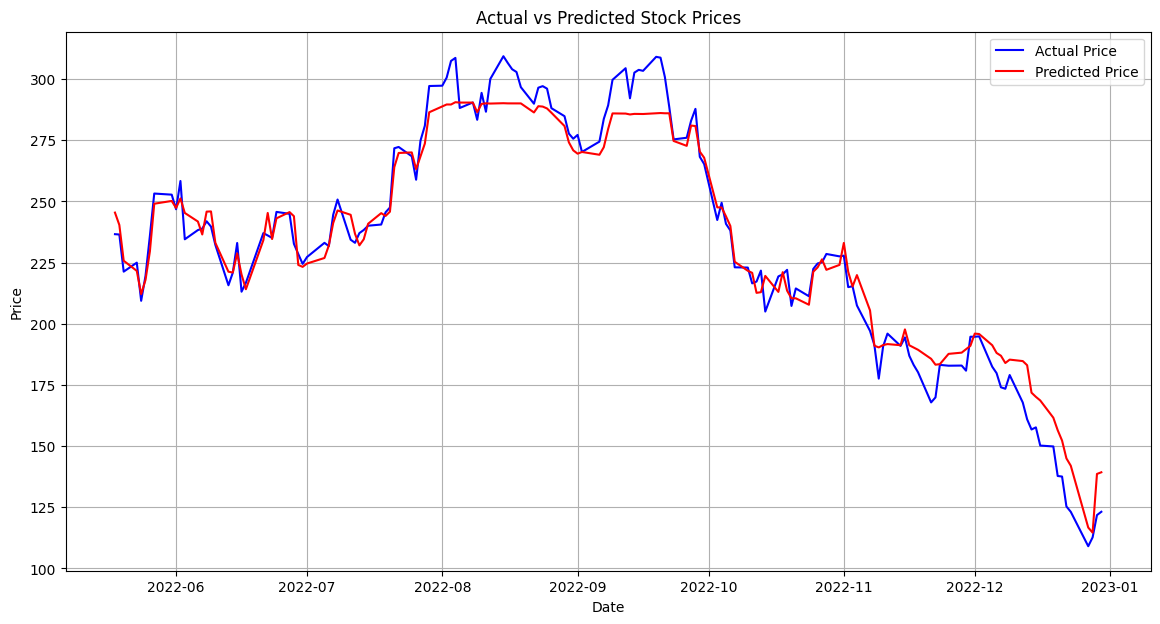

In [ ]:
# Make predictions on the validation set
y_val_pred = best_model.predict(X_val)

# Evaluate the model on the validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_r2 = r2_score(y_val, y_val_pred)

print(f"\nValidation Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"Validation Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Validation Root Mean Squared Error (RMSE): {val_rmse:.2f}")
print(f"Validation R-squared (R2): {val_r2:.2f}")

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Test R-squared (R2): {test_r2:.2f}")

# Visualise the predictions
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Price', color='b')
plt.plot(y_test.index, y_test_pred, label='Predicted Price', color='r')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

# SVR Section

## SVR Default 10 year - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download the historical stock data for the past 10 years
data = yf.download('TSLA', start='2013-01-01', end='2023-01-01')

# Prepare data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

[*********************100%***********************]  1 of 1 completed


In [ ]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("R^2 Score:", r2)

Mean Absolute Error (MAE): 6.58
Mean Squared Error (MSE): 370.36
Root Mean Squared Error (RMSE): 19.24
R^2 Score: 0.9627610978200003


## SVR Default 5 year - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download the historical stock data for the past 5 years
data = yf.download('TSLA', start='2018-01-01', end='2023-01-01')

# Prepare the feature matrix (X) and target vector (y)
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R^2 Score:", r2)

[*********************100%***********************]  1 of 1 completed

Mean Squared Error (MSE): 631.9204267078072
Mean Absolute Error (MAE): 12.434032389590678
Root Mean Squared Error (RMSE): 25.138027502328164
R^2 Score: 0.9534223394358035


## SVR Feature Engineering - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical stock data for Tesla (TSLA) for the past 5 years
data = yf.download('TSLA', start='2018-01-01', end='2023-01-01')

# Feature Engineering: Moving Averages (SMA) and Relative Strength Index (RSI)
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['SMA_20', 'SMA_200', 'RSI', 'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

# Make predictions on the test set
y_train_pred = svr.predict(X_train)
y_val_pred = svr.predict(X_val)
y_test_pred = svr.predict(X_test)

In [ ]:
# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mse_val = mean_squared_error(y_val, y_val_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
r2_val = r2_score(y_val, y_val_pred)

mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_overall = mean_squared_error(y, svr.predict(X_scaled))
mae_overall = mean_absolute_error(y, svr.predict(X_scaled))
r2_overall = r2_score(y, svr.predict(X_scaled))

# Calculate RMSE for each set
rmse_train = np.sqrt(mse_train)
rmse_val = np.sqrt(mse_val)
rmse_test = np.sqrt(mse_test)
rmse_overall = np.sqrt(mse_overall)

# Display results with RMSE
print("Training Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_train:.2f}")
print(f"R^2 Score: {r2_train:.2f}")

print("\nValidation Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_val:.2f}")
print(f"Mean Squared Error (MSE): {mse_val:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_val:.2f}")
print(f"R^2 Score: {r2_val:.2f}")

print("\nTesting Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_test:.2f}")
print(f"Mean Squared Error (MSE): {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R^2 Score: {r2_test:.2f}")

print("\nOverall Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_overall:.2f}")
print(f"Mean Squared Error (MSE): {mse_overall:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_overall:.2f}")
print(f"R^2 Score: {r2_overall:.2f}")

Training Set Evaluation:
Mean Absolute Error (MAE): 19.13
Mean Squared Error (MSE): 1095.63
Root Mean Squared Error (RMSE): 33.10
R^2 Score: 0.92

Validation Set Evaluation:
Mean Absolute Error (MAE): 15.68
Mean Squared Error (MSE): 732.32
Root Mean Squared Error (RMSE): 27.06
R^2 Score: 0.94

Testing Set Evaluation:
Mean Absolute Error (MAE): 17.74
Mean Squared Error (MSE): 892.60
Root Mean Squared Error (RMSE): 29.88
R^2 Score: 0.93

Overall Set Evaluation:
Mean Absolute Error (MAE): 18.40
Mean Squared Error (MSE): 1010.68
Root Mean Squared Error (RMSE): 31.79
R^2 Score: 0.93


## SVR HyperTuning - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Step 2: Download the historical stock data for the past 5 years
data = yf.download('TSLA', start='2018-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']].iloc[:-1]
y = data['Close'].iloc[:-1]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform train-validation-test split (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/(0.85), random_state=42)

# Perform hyperparameter optimization using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train, y_train)
svr_best = grid_search.best_estimator_

In [ ]:
# Evaluate the model on the training set
predictions_train = svr_best.predict(X_train)
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

# Evaluate the model on the validation set
predictions_val = svr_best.predict(X_val)
mae_val = mean_absolute_error(y_val, predictions_val)
mse_val = mean_squared_error(y_val, predictions_val)
r2_val = r2_score(y_val, predictions_val)

# Evaluate the model on the test set
predictions_test = svr_best.predict(X_test)
mae_test = mean_absolute_error(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
r2_test = r2_score(y_test, predictions_test)

# Evaluate the model on the overall dataset
predictions_all = svr_best.predict(X_scaled)
mae_all = mean_absolute_error(y, predictions_all)
mse_all = mean_squared_error(y, predictions_all)
r2_all = r2_score(y, predictions_all)

# Print evaluations
print("Training Set Evaluation:")
print(f"MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, R2: {r2_train:.2f}")

print("Validation Set Evaluation:")
print(f"MAE: {mae_val:.2f}, MSE: {mse_val:.2f}, R2: {r2_val:.2f}")

print("Testing Set Evaluation:")
print(f"MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, R2: {r2_test:.2f}")

print("Overall Set Evaluation:")
print(f"MAE: {mae_all:.2f}, MSE: {mse_all:.2f}, R2: {r2_all:.2f}")

In [ ]:
# Train a new SVR model using the best parameters
svr_tuned = SVR(kernel='rbf', C=svr_best.C, gamma=svr_best.gamma)
svr_tuned.fit(X_train, y_train)

# Make predictions with the tuned model
y_train_pred_tuned = svr_tuned.predict(X_train)
y_val_pred_tuned = svr_tuned.predict(X_val)
y_test_pred_tuned = svr_tuned.predict(X_test)

# Evaluate the model with tuned hyperparameters
def evaluate_model(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{set_name} Set Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

evaluate_model(y_train, y_train_pred_tuned, "Tuned Training")
evaluate_model(y_val, y_val_pred_tuned, "Tuned Validation")
evaluate_model(y_test, y_test_pred_tuned, "Tuned Testing")

# Evaluate the tuned model on the entire dataset (for overall performance)
y_pred_all_tuned = svr_tuned.predict(X_scaled)
evaluate_model(y, y_pred_all_tuned, "Tuned Overall")

[*********************100%***********************]  1 of 1 completed


Training Set Evaluation:
MAE: 2.42, MSE: 18.70, R2: 1.00
Validation Set Evaluation:
MAE: 2.57, MSE: 19.96, R2: 1.00
Testing Set Evaluation:
MAE: 2.30, MSE: 14.88, R2: 1.00
Overall Set Evaluation:
MAE: 2.42, MSE: 18.31, R2: 1.00

Tuned Training Set Evaluation:
Mean Absolute Error (MAE): 2.42
Mean Squared Error (MSE): 18.70
Root Mean Squared Error (RMSE): 4.32
R-squared (R2): 1.00

Tuned Validation Set Evaluation:
Mean Absolute Error (MAE): 2.57
Mean Squared Error (MSE): 19.96
Root Mean Squared Error (RMSE): 4.47
R-squared (R2): 1.00

Tuned Testing Set Evaluation:
Mean Absolute Error (MAE): 2.30
Mean Squared Error (MSE): 14.88
Root Mean Squared Error (RMSE): 3.86
R-squared (R2): 1.00

Tuned Overall Set Evaluation:
Mean Absolute Error (MAE): 2.42
Mean Squared Error (MSE): 18.31
Root Mean Squared Error (RMSE): 4.28
R-squared (R2): 1.00


## SVR Combine 1 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Download historical stock data for Tesla (TSLA) for the past 7 years
data = yf.download('TSLA', start='2016-01-01', end='2023-01-01')

# Feature Engineering: Moving Averages, RSI, and Lags
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices
data['lag_1'] = data['Close'].shift(1)
data['lag_2'] = data['Close'].shift(2)
data['lag_3'] = data['Close'].shift(3)
data['lag_4'] = data['Close'].shift(4)
data['lag_5'] = data['Close'].shift(5)

# Drop rows with missing values
data.dropna(inplace=True)

In [ ]:
# Prepare the data
X = data[['SMA_50', 'SMA_200', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data['Close']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/(0.85), shuffle=False)

# Perform hyperparameter tuning with GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Train a new SVR model using the best parameters
svr_tuned = SVR(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svr_tuned.fit(X_train, y_train)

[*********************100%***********************]  1 of 1 completed


SVR(C=100, gamma=0.01)

In [ ]:
# Make predictions with the tuned model
y_train_pred_tuned = svr_tuned.predict(X_train)
y_val_pred_tuned = svr_tuned.predict(X_val)
y_test_pred_tuned = svr_tuned.predict(X_test)

# Evaluate the model with tuned hyperparameters
def evaluate_model(y_true, y_pred, set_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{set_name} Set Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("R² Score:", r2)

evaluate_model(y_train, y_train_pred_tuned, "Tuned Training")
evaluate_model(y_val, y_val_pred_tuned, "Tuned Validation")
evaluate_model(y_test, y_test_pred_tuned, "Tuned Testing")


Tuned Training Set Evaluation:
Mean Absolute Error (MAE): 1.47
Mean Squared Error (MSE): 9.95
Root Mean Squared Error (RMSE): 3.15
R² Score: 0.9971161798555265

Tuned Validation Set Evaluation:
Mean Absolute Error (MAE): 16.08
Mean Squared Error (MSE): 451.69
Root Mean Squared Error (RMSE): 21.25
R² Score: 0.8733671080897352

Tuned Testing Set Evaluation:
Mean Absolute Error (MAE): 12.18
Mean Squared Error (MSE): 225.96
Root Mean Squared Error (RMSE): 15.03
R² Score: 0.9247710057964121


## SVR Combine 2 - MAE

In [ ]:
import time
import yfinance as yf
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Start timer for data download
start_time = time.time()
# Download historical stock data for Tesla (TSLA) for the past 7 years
data = yf.download('TSLA', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()
# Feature Engineering: Moving Averages, RSI, Lags, and Volatility Measures
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate RSI
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices (5 lags)
for lag in range(1, 6):
    data[f'lag_{lag}'] = data['Close'].shift(lag)

# Volatility Measures - Standard Deviation
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Drop rows with missing values
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.11 seconds
Time taken for feature engineering: 0.04 seconds


In [ ]:
# Prepare the data
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Start timer for splitting data
start_time = time.time()
# Split the data into training, validation, and test sets (80/10/10)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

# Start timer for hyperparameter tuning
start_time = time.time()
# Perform hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf', 'linear', 'poly']
}

grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best parameters found: {best_params}")
print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

# Start timer for training the tuned SVR model
start_time = time.time()
# Train a new SVR model using the best parameters
svr_tuned = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
svr_tuned.fit(X_train, y_train)
print(f"Time taken to train SVR model: {time.time() - start_time:.2f} seconds")

Time taken for data splitting: 0.01 seconds
Best parameters found: {'C': 1000, 'gamma': 1, 'kernel': 'linear'}
Time taken for hyperparameter tuning: 59.70 seconds
Time taken to train SVR model: 1.42 seconds


In [ ]:
# Make predictions and evaluate the model
y_val_pred = svr_tuned.predict(X_val)
y_test_pred = svr_tuned.predict(X_test)

# Evaluate the model on validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate the model on test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"\nValidation Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"Validation Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Validation Root Mean Squared Error (RMSE): {val_rmse:.2f}")
print(f"Validation R-squared (R2): {val_r2:.2f}")

print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Test R-squared (R2): {test_r2:.2f}")


Validation Mean Absolute Error (MAE): 10.50
Validation Mean Squared Error (MSE): 196.11
Validation Root Mean Squared Error (RMSE): 14.00
Validation R-squared (R2): 0.88

Test Mean Absolute Error (MAE): 7.06
Test Mean Squared Error (MSE): 85.76
Test Root Mean Squared Error (RMSE): 9.26
Test R-squared (R2): 0.96


## SVR Combine 3 - MAE

In [ ]:
import time
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Start timer for data download
start_time = time.time()

# Download historical stock data for Tesla (TSLA) for the past 7 years
data = yf.download('TSLA', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()

# Feature Engineering: Moving Averages, RSI, Lags, MACD, Bollinger Bands, and Volatility Measures
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate RSI
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices (5 lags)
for lag in range(1, 6):
    data[f'lag_{lag}'] = data['Close'].shift(lag)

# Volatility Measures - Standard Deviation
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Function to compute the Moving Average Convergence Divergence (MACD)
def compute_macd(data, short_window=12, long_window=26):
    exp1 = data['Close'].ewm(span=short_window, adjust=False).mean()
    exp2 = data['Close'].ewm(span=long_window, adjust=False).mean()
    return exp1 - exp2

# Calculate MACD
data['MACD'] = compute_macd(data)

# Calculate Bollinger Bands
data['Bollinger_High'] = data['Close'].rolling(window=20).mean() + (data['Close'].rolling(window=20).std() * 2)
data['Bollinger_Low'] = data['Close'].rolling(window=20).mean() - (data['Close'].rolling(window=20).std() * 2)

# Drop rows with missing values (
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.06 seconds
Time taken for feature engineering: 0.02 seconds


In [ ]:
# Prepare the data
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d', 'MACD',
           'Bollinger_High', 'Bollinger_Low'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Start timer for splitting data
start_time = time.time()

# Split the data into training, validation, and test sets (80/10/10)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

Time taken for data splitting: 0.00 seconds


In [ ]:
# Start timer for hyperparameter tuning
start_time = time.time()

# Perform hyperparameter tuning with RandomizedSearchCV
param_dist = {
    'C': [1, 10, 100],
    'gamma': [0.01, 0.001, 'scale'],
    'kernel': ['rbf', 'linear']
}

random_search = RandomizedSearchCV(SVR(), param_distributions=param_dist,
                                   n_iter=10, cv=5, scoring='neg_mean_squared_error',
                                   verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print(f"Best parameters found: {best_params}")
print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

# Start timer for training the tuned SVR model
start_time = time.time()

# Train a new SVR model using the best parameters
svr_tuned = SVR(kernel=best_params['kernel'], C=best_params['C'], gamma=best_params['gamma'])
svr_tuned.fit(X_train, y_train)
print(f"Time taken to train SVR model: {time.time() - start_time:.2f} seconds")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters found: {'kernel': 'linear', 'gamma': 0.01, 'C': 100}
Time taken for hyperparameter tuning: 12.80 seconds
Time taken to train SVR model: 0.69 seconds


In [ ]:
# Make predictions and evaluate the model
y_val_pred = svr_tuned.predict(X_val)
y_test_pred = svr_tuned.predict(X_test)

# Evaluate the model on validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_rmse = val_mse ** 0.5
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate the model on test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = test_mse ** 0.5
test_r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"\nValidation Mean Absolute Error (MAE): {val_mae:.2f}")
print(f"Validation Mean Squared Error (MSE): {val_mse:.2f}")
print(f"Validation Root Mean Squared Error (RMSE): {val_rmse:.2f}")
print(f"Validation R-squared (R2): {val_r2:.2f}")

print(f"\nTest Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Test Mean Squared Error (MSE): {test_mse:.2f}")
print(f"Test Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Test R-squared (R2): {test_r2:.2f}")


Validation Mean Absolute Error (MAE): 9.68
Validation Mean Squared Error (MSE): 162.57
Validation Root Mean Squared Error (RMSE): 12.75
Validation R-squared (R2): 0.90

Test Mean Absolute Error (MAE): 7.12
Test Mean Squared Error (MSE): 81.09
Test Root Mean Squared Error (RMSE): 9.00
Test R-squared (R2): 0.97


# Linear Section

## Linear 10 years - MAE -

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Download historical stock data for Tesla (TSLA) for the past 10 years
data = yf.download('TSLA', start='2012-01-01', end='2023-01-01')

# Prepare feature matrix (X) and target vector (y)
X = data[['Open', 'High', 'Low', 'Volume']]  # Features
y = data['Close']  # Target variable: today's closing price

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Train the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions
y_pred = linreg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

[*********************100%***********************]  1 of 1 completed

Mean Absolute Error (MAE): 0.7456321834182394
Mean Squared Error (MSE): 2.9434478191820195
Root Mean Squared Error (RMSE): 1.7156479298451706
R² Score: 0.9997288599075786


##Linear Default -MAE


In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Download historical stock data for Tesla (TSLA) for the past 5 years
data = yf.download('TSLA', start='2018-01-01', end='2023-01-01')

# Prepare feature matrix (X) and target vector (y)
X = data[['Open', 'High', 'Low', 'Volume']]  # Features
y = data['Close']  # Target variable: today's closing price

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Train the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Make predictions
y_pred = linreg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

[*********************100%***********************]  1 of 1 completed

Mean Absolute Error (MAE): 1.519869131783854
Mean Squared Error (MSE): 7.998550051004621
Root Mean Squared Error (RMSE): 2.8281707959394216
R² Score: 0.9994104419899474


## Linear Feature Engineering -MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import time as time

# Start timer for data download
start_time = time.time()
# Download historical stock data for Tesla (TSLA) for the past 7 years
data = yf.download('TSLA', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()

# Feature Engineering:
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices
data['lag_1'] = data['Close'].shift(1)
data['lag_2'] = data['Close'].shift(2)
data['lag_3'] = data['Close'].shift(3)
data['lag_4'] = data['Close'].shift(4)
data['lag_5'] = data['Close'].shift(5)

# Drop rows with missing values
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

In [ ]:
# Prepare the data
X = data[['SMA_20', 'SMA_200', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data['Close']

# Start timer for splitting data
start_time = time.time()
# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/(0.85), shuffle=False)
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

In [ ]:
# Start timer for model training
start_time = time.time()
# Train the Linear Regression model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
print(f"Time taken to train Linear Regression model: {time.time() - start_time:.2f} seconds")

# Make predictions
y_train_pred = linreg.predict(X_train)
y_val_pred = linreg.predict(X_val)
y_test_pred = linreg.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred, set_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{set_name} Set Evaluation:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print("R² Score:", r2)

evaluate_model(y_train, y_train_pred, "Training")
evaluate_model(y_val, y_val_pred, "Validation")
evaluate_model(y_test, y_test_pred, "Testing")

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.05 seconds
Time taken for feature engineering: 0.02 seconds
Time taken for data splitting: 0.01 seconds
Time taken to train Linear Regression model: 0.00 seconds

Training Set Evaluation:
Mean Absolute Error (MAE): 1.49
Mean Squared Error (MSE): 8.74
Root Mean Squared Error (RMSE): 2.96
R² Score: 0.9974660765197598

Validation Set Evaluation:
Mean Absolute Error (MAE): 10.65
Mean Squared Error (MSE): 169.64
Root Mean Squared Error (RMSE): 13.02
R² Score: 0.9524410505445163

Testing Set Evaluation:
Mean Absolute Error (MAE): 15.86
Mean Squared Error (MSE): 340.17
Root Mean Squared Error (RMSE): 18.44
R² Score: 0.8867505011214099


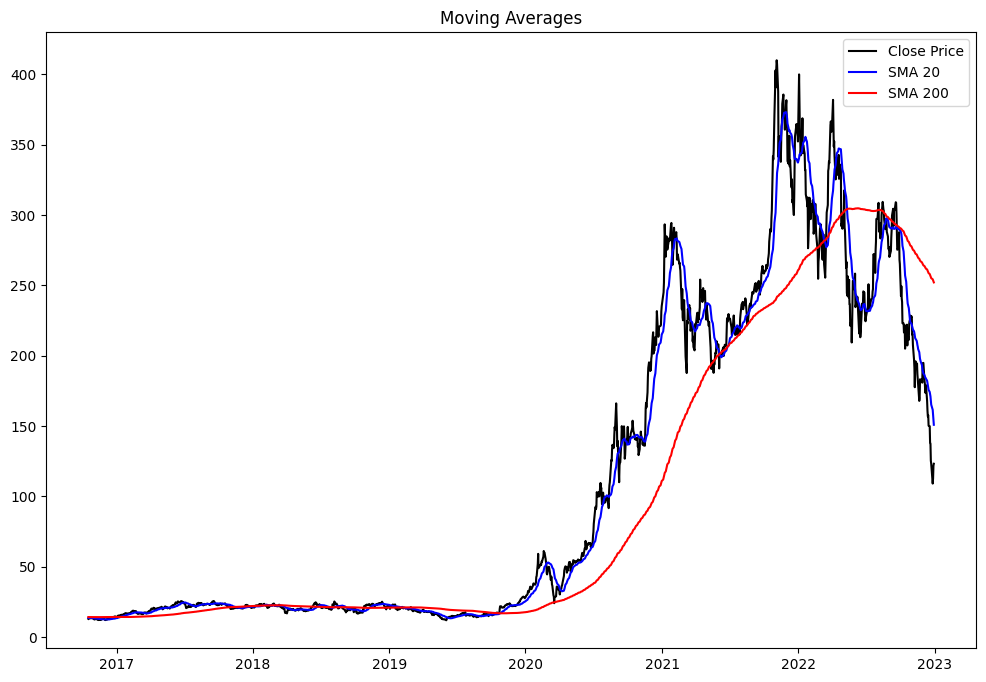

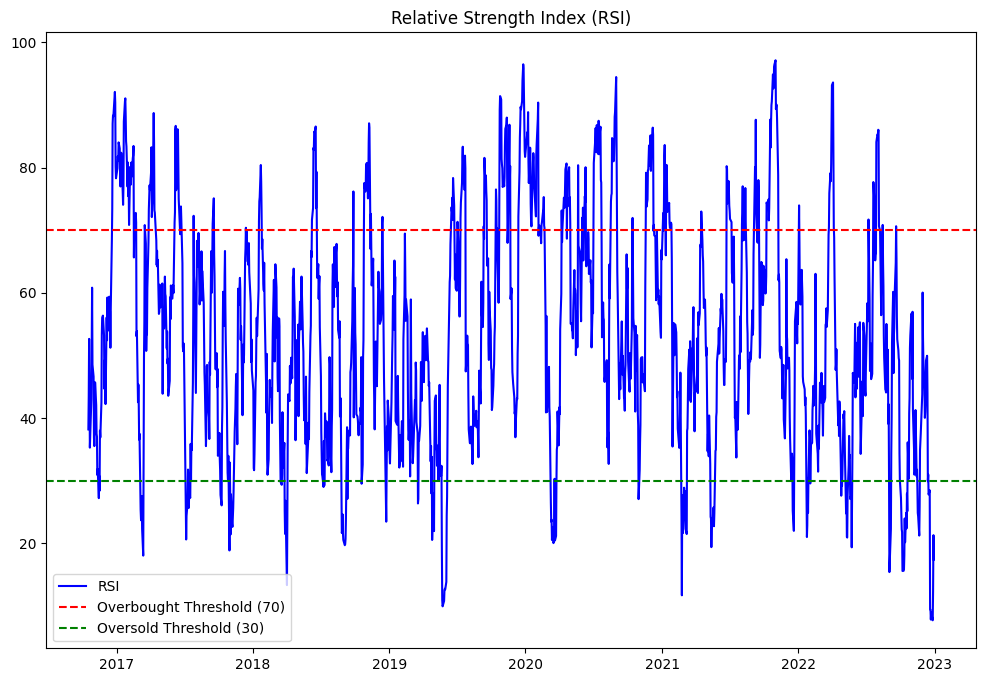

In [ ]:
import matplotlib.pyplot as plt

# Plot Moving Averages
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['Close'], label='Close Price', color='black')
plt.plot(data.index, data['SMA_20'], label='SMA 20', color='blue')
plt.plot(data.index, data['SMA_200'], label='SMA 200', color='red')
plt.title('Moving Averages')
plt.legend()
plt.show()

# Plot Relative Strength Index (RSI)
plt.figure(figsize=(12, 8))
plt.plot(data.index, data['RSI'], label='RSI', color='blue')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought Threshold (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold Threshold (30)')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()

## Linear Hypertuning - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import time
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Start timer for data download
start_time = time.time()

# Download historical stock data for Tesla (TSLA) for the past 7 years
data = yf.download('TSLA', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Start timer for splitting data
start_time = time.time()

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/0.85, shuffle=False)
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.73 seconds
Time taken for data splitting: 0.03 seconds


In [ ]:
# Hyperparameter Tuning using GridSearchCV
start_time = time.time()

# Define the parameter grid for polynomial degree
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}

# Create a Linear Regression model
linreg = LinearRegression()

# Create a model that will turn the features into polynomial features
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linreg', linreg)
])

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_val, y_train_val)

print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

Time taken for hyperparameter tuning: 2.70 seconds


In [ ]:
# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Testing (Best Model) - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Testing (Best Model) - MAE: 3.32, MSE: 17.71, RMSE: 4.21, R2: 0.99


## Linear combine 1- MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import time
from sklearn.pipeline import Pipeline

# Download historical stock data for Tesla (TSLA) for the past 7 years
data = yf.download('TSLA', start='2016-01-01', end='2023-01-01')

# Start timer for feature engineering
start_time = time.time()

# Feature Engineering: Moving Averages, RSI, and Lags
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices
for lag in range(1, 6):
    data[f'lag_{lag}'] = data['Close'].shift(lag)

# Drop rows with missing values (introduced by lags and moving averages)
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed

Time taken for feature engineering: 0.01 seconds


In [ ]:
# Prepare the data
X = data[['SMA_20', 'SMA_200', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data['Close']

# Start timer for splitting data
start_time = time.time()

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15/0.85, shuffle=False)
print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

# Hyperparameter Tuning using GridSearchCV
start_time = time.time()

Time taken for data splitting: 0.02 seconds


In [ ]:
# Create a Linear Regression model
linreg = LinearRegression()

# Create a model that will turn the features into polynomial features
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linreg', linreg)
])

# Define the parameter grid for polynomial degree
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_val, y_train_val)  # Fit on combined train and validation data

print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Testing (Best Model) - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Time taken for hyperparameter tuning: 30.86 seconds
Testing (Best Model) - MAE: 7.76, MSE: 108.38, RMSE: 10.41, R2: 0.96


## Linear Comine 2 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import time
from sklearn.pipeline import Pipeline

# Start timer for data download
start_time = time.time()

# Download historical stock data for Tesla (TSLA) for the past 7 years
data = yf.download('TSLA', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()

# Feature Engineering: Moving Averages, RSI, and Lags
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Lagged Close prices
for lag in range(1, 6):
    data[f'lag_{lag}'] = data['Close'].shift(lag)

# Drop rows with missing values
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.12 seconds
Time taken for feature engineering: 0.02 seconds


In [ ]:
# Prepare the data
X = data[['SMA_20', 'SMA_200', 'RSI', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5']]
y = data['Close']

# Start timer for splitting data
start_time = time.time()

# Split the data into training (80%) and temporary (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)

# Split the temporary data into validation (10%) and testing (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

Time taken for data splitting: 0.01 seconds


In [ ]:
# Hyperparameter Tuning using GridSearchCV
start_time = time.time()

# Create a Linear Regression model
linreg = LinearRegression()

# Create a model that will turn the features into polynomial features
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linreg', linreg)
])

# Define the parameter grid for polynomial degree
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]  #
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)  # Fit on training data

print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Testing (Best Model) - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Time taken for hyperparameter tuning: 15.99 seconds
Testing (Best Model) - MAE: 6.74, MSE: 77.65, RMSE: 8.81, R2: 0.97


## Linear Combine 3 - MAE



In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import time
from sklearn.pipeline import Pipeline

# Start timer for data download
start_time = time.time()

# Download historical stock data for Tesla (TSLA) for the past 7 years
data = yf.download('TSLA', start='2016-01-01', end='2023-01-01')
print(f"Time taken to download data: {time.time() - start_time:.2f} seconds")

# Start timer for feature engineering
start_time = time.time()

# Feature Engineering: Moving Averages, RSI, and Lags
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Volatility (30-day rolling standard deviation)
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# MACD calculation
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']

# Bollinger Bands (20-day moving average and 2 standard deviations)
data['Bollinger_MA'] = data['Close'].rolling(window=20).mean()
data['Bollinger_STD'] = data['Close'].rolling(window=20).std()
data['Bollinger_High'] = data['Bollinger_MA'] + (data['Bollinger_STD'] * 2)
data['Bollinger_Low'] = data['Bollinger_MA'] - (data['Bollinger_STD'] * 2)

# Lagged Close prices
for lag in range(1, 6):
    data[f'lag_{lag}'] = data['Close'].shift(lag)

# Drop rows with missing values (introduced by lags and moving averages)
data.dropna(inplace=True)
print(f"Time taken for feature engineering: {time.time() - start_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed

Time taken to download data: 0.10 seconds
Time taken for feature engineering: 0.02 seconds


In [ ]:
# Prepare the data
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d', 'MACD',
           'Bollinger_High', 'Bollinger_Low'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

# Start timer for splitting data
start_time = time.time()

# Split the data into training (80%) and temporary (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, shuffle=False)

# Split the temporary data into validation (10%) and testing (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

print(f"Time taken for data splitting: {time.time() - start_time:.2f} seconds")

Time taken for data splitting: 0.00 seconds


In [ ]:
# Hyperparameter Tuning using GridSearchCV
start_time = time.time()

# Create a Linear Regression model
linreg = LinearRegression()

# Create a model that will turn the features into polynomial features
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linreg', linreg)
])

# Define the parameter grid for polynomial degree
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f"Time taken for hyperparameter tuning: {time.time() - start_time:.2f} seconds")

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)

# Print evaluation metrics
print(f"Testing (Best Model) - MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}")

Time taken for hyperparameter tuning: 48.91 seconds
Testing (Best Model) - MAE: 6.39, MSE: 67.25, RMSE: 8.20, R2: 0.97


# Polynomial Section

## Polynomial default 10 years - MAE

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Tesla stocks from Yahoo Finance (10 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2013-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Transform the features to include polynomial terms
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialise and fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 1.14303033739272
Mean Squared Error (MSE): 5.27565245990605
Root Mean Squared Error (RMSE): 2.2968788518130534
R-squared (R2): 0.9994695516269543


## Polynomial Default 5 years - MAE

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Download historical data for Tesla stocks from Yahoo Finance (5 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Transform the features to include polynomial terms
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialise and fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

Mean Absolute Error (MAE): 2.078075801432233
Mean Squared Error (MSE): 9.872970573942036
Root Mean Squared Error (RMSE): 3.1421283509656375
R-squared (R2): 0.9992722819951412


## Polynominal Feature Engineering- MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Download historical data for Tesla stocks from Yahoo Finance (5 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))
data['Lag1'] = data['Close'].shift(1)
data['Lag2'] = data['Close'].shift(2)
data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI', 'Lag1', 'Lag2']]
y = data['Close']

# Split the data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Transform the features to include polynomial terms
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_val_poly = poly.transform(X_val_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialise and fit the polynomial ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_poly, y_train)
y_pred_ridge = ridge_model.predict(X_test_poly)

In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, ridge_model.predict(X_train_poly))
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, ridge_model.predict(X_val_poly))
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_pred_ridge)

# Display results
print("\nTraining Set:")
print("MAE:", mae_train)
print("MSE:", mse_train)
print("RMSE:", rmse_train)
print("R2:", r2_train)

print("\nValidation Set:")
print("MAE:", mae_val)
print("MSE:", mse_val)
print("RMSE:", rmse_val)
print("R2:", r2_val)

print("\nTesting Set (Ridge Regression):")
print("MAE:", mae_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)
print("R2:", r2_test)


Training Set:
MAE: 1.1641734477637105
MSE: 3.420229145011615
RMSE: 1.8493861535686957
R2: 0.9995923041007585

Validation Set:
MAE: 5.0930120091767375
MSE: 42.84614083399212
RMSE: 6.545696359746007
R2: 0.973672405633727

Testing Set (Ridge Regression):
MAE: 4.404563036548921
MSE: 29.140352426441634
RMSE: 5.398180473682001
R2: 0.9875553864215723


## Polynominal Hypertuning - MAE

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Tesla stocks from Yahoo Finance (7 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Volume', 'Low']]
y = data['Close']

# Split the data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the updated parameter distributions for searching
param_distributions = {
    'polynomialfeatures__degree': [2, 3],
    'ridge__alpha': uniform(loc=0, scale=10)
}

# Create a pipeline for polynomial transformation and Ridge regression
pipeline = make_pipeline(PolynomialFeatures(), Ridge())

# Perform RandomizedSearchCV with a set number of iterations
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=10, cv=5, scoring='neg_mean_absolute_error', random_state=42)
random_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = random_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print("Best Parameters:", random_search.best_params_)
print("\nEvaluation Metrics for Testing Set:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

Best Parameters: {'polynomialfeatures__degree': 3, 'ridge__alpha': 1.8182496720710062}

Evaluation Metrics for Testing Set:
MAE: 8.47
MSE: 119.76
RMSE: 10.94
R2: 0.97


## Polynominal combine 1  - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Tesla stocks from Yahoo Finance (7 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
          'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create a pipeline for polynomial transformation and Ridge regression
pipeline = make_pipeline(PolynomialFeatures(), Ridge())

# Define the parameter grid for GridSearchCV
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 1, 10, 100, 1000]
}


# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_train_pred = best_model.predict(X_train_scaled)
y_val_pred = best_model.predict(X_val_scaled)
y_test_pred = best_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("Best Parameters:", grid_search.best_params_)

print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

Best Parameters: {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.1}

Training Set:
MAE: 0.47
MSE: 1.07
RMSE: 1.03
R2: 1.00

Validation Set:
MAE: 3.46
MSE: 21.42
RMSE: 4.63
R2: 0.99

Testing Set:
MAE: 5.05
MSE: 39.41
RMSE: 6.28
R2: 0.99


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Tesla stocks from Yahoo Finance (7 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
          'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create a pipeline for polynomial transformation, scaling, and Ridge regression
pipeline = make_pipeline(PolynomialFeatures(), StandardScaler(), Ridge())

# Define the parameter grid for GridSearchCV
# Updated parameters: limiting degree and expanding alpha values
param_grid = {
    'polynomialfeatures__degree': [1, 2, 3],  # Limit degree to prevent overfitting
    'ridge__alpha': [0.1, 1, 10, 100, 1000]   # Increase alpha range to improve regularization
}

# Use TimeSeriesSplit for cross-validation (since this is time-series data)
tscv = TimeSeriesSplit(n_splits=5)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=tscv,
                           scoring='neg_mean_absolute_error',
                           verbose=1)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_train_pred = best_model.predict(X_train_scaled)
y_val_pred = best_model.predict(X_val_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("Best Parameters:", grid_search.best_params_)

print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

[*********************100%***********************]  1 of 1 completed


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.1}

Training Set:
MAE: 0.47
MSE: 1.07
RMSE: 1.03
R2: 1.00

Validation Set:
MAE: 3.46
MSE: 21.42
RMSE: 4.63
R2: 0.99

Testing Set:
MAE: 5.05
MSE: 39.41
RMSE: 6.28
R2: 0.99


## Polynominal combine 2 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score)

# Set a random seed for reproducibility
random_seed = 42
np.random.seed(random_seed)

# Download historical data for Tesla stocks from Yahoo Finance (7 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
           'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into training (60%), validation (20%), and testing (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

# Create a pipeline for polynomial transformation, scaling, and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('ridge', Ridge())
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'poly_features__degree': [1, 2, 3],
    'ridge__alpha': [0.1, 1, 10, 100, 1000]
}

# Implement K-Fold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=random_seed)

# Perform GridSearchCV to find the best hyperparameters with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_absolute_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

In [ ]:
# Make predictions
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Training set evaluation
mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)

# Validation set evaluation
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)

# Testing set evaluation
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("\nTraining Set Metrics:")
print(f"MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, R2: {r2_train:.2f}")

print("\nValidation Set Metrics:")
print(f"MAE: {mae_val:.2f}, MSE: {mse_val:.2f}, RMSE: {rmse_val:.2f}, R2: {r2_val:.2f}")

print("\nTesting Set Metrics:")
print(f"MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, R2: {r2_test:.2f}")

[*********************100%***********************]  1 of 1 completed


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'poly_features__degree': 1, 'ridge__alpha': 0.1}

Training Set Metrics:
MAE: 0.20, MSE: 0.10, RMSE: 0.32, R2: 1.00

Validation Set Metrics:
MAE: 2.22, MSE: 8.52, RMSE: 2.92, R2: 1.00

Testing Set Metrics:
MAE: 3.82, MSE: 24.28, RMSE: 4.93, R2: 0.99


## Polynominal combine 3 -MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Tesla stocks
symbol = 'TSLA'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data['RSI'] = calculate_rsi(data)
data['Volatility_30d'] = data['Close'].rolling(window=30).std()
data['MACD'] = (data['Close'].ewm(span=12).mean() - data['Close'].ewm(span=26).mean())
data['Bollinger_High'] = data['SMA_50'] + (data['Close'].rolling(window=50).std() * 2)
data['Bollinger_Low'] = data['SMA_50'] - (data['Close'].rolling(window=50).std() * 2)

# Generate lagged features and drop NaNs
for i in range(1, 6):
    data[f'lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d', 'MACD', 'Bollinger_High', 'Bollinger_Low'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

# Split the data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

In [ ]:
# Create a pipeline for polynomial transformation, scaling, and Ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures()),
    ('ridge', Ridge(max_iter=20000, tol=1e-3))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'poly_features__degree': [1, 2, 3],  # Limit degree to prevent overfitting
    'ridge__alpha': [0.1, 1, 10, 100, 1000]  # Increase alpha range to improve regularization
}

# Implement K-Fold Cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Set a fixed random seed for reproducibility

# Perform GridSearchCV to find the best hyperparameters with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=kf, scoring='neg_mean_absolute_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

In [ ]:
# Make predictions
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Training set evaluation
mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)

# Validation set evaluation
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)

# Testing set evaluation
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("\nTraining Set Metrics:")
print(f"MAE: {mae_train:.2f}, MSE: {mse_train:.2f}, RMSE: {rmse_train:.2f}, R2: {r2_train:.2f}")

print("\nValidation Set Metrics:")
print(f"MAE: {mae_val:.2f}, MSE: {mse_val:.2f}, RMSE: {rmse_val:.2f}, R2: {r2_val:.2f}")

print("\nTesting Set Metrics:")
print(f"MAE: {mae_test:.2f}, MSE: {mse_test:.2f}, RMSE: {rmse_test:.2f}, R2: {r2_test:.2f}")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'poly_features__degree': 2, 'ridge__alpha': 0.1}

Training Set Metrics:
MAE: 0.83, MSE: 1.89, RMSE: 1.37, R2: 1.00

Validation Set Metrics:
MAE: 146.77, MSE: 24721.59, RMSE: 157.23, R2: -5.93

Testing Set Metrics:
MAE: 411.55, MSE: 191895.70, RMSE: 438.06, R2: -62.89


# Elastic Section

## Elastic Default 10 years -  MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Tesla stocks from Yahoo Finance (10 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2013-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialise and fit the Elastic Net regression model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

[*********************100%***********************]  1 of 1 completed


Mean Absolute Error (MAE): 11.996576171835043
Mean Squared Error (MSE): 225.3445843764366
Root Mean Squared Error (RMSE): 15.011481751527281
R-squared (R2): 0.9773423914737419


## Elastic default 5 years- MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Tesla stocks from Yahoo Finance (5 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialies and fit the Elastic Net regression model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nMean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

[*********************100%***********************]  1 of 1 completed


Mean Absolute Error (MAE): 15.858439209161086
Mean Squared Error (MSE): 314.4132534592765
Root Mean Squared Error (RMSE): 17.731701933522245
R-squared (R2): 0.9768251932085709


## Elastic Feature Engineering - MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Tesla stocks from Yahoo Finance (7 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
          'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialise and fit the Elastic Net regression model
model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # Adjust alpha and l1_ratio
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")


Training Set:
MAE: 2.63
MSE: 20.75
RMSE: 4.56
R2: 0.99

Validation Set:
MAE: 12.86
MSE: 216.90
RMSE: 14.73
R2: 0.94

Testing Set:
MAE: 27.24
MSE: 892.23
RMSE: 29.87
R2: 0.70


## Elastic Hypertuning- MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Download historical data for Tesla stocks from Yahoo Finance (7 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Volume', 'Low']]
y = data['Close']

# Split the data
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9]
}

model = ElasticNet(max_iter=10000)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_

# Make predictions
y_train_pred = best_model.predict(X_train_scaled)
y_val_pred = best_model.predict(X_val_scaled)
y_test_pred = best_model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("Best Parameters:", grid_search.best_params_)
print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.9}

Training Set:
MAE: 0.39
MSE: 0.80
RMSE: 0.90
R2: 1.00

Validation Set:
MAE: 3.18
MSE: 19.32
RMSE: 4.40
R2: 0.99

Testing Set:
MAE: 4.39
MSE: 31.58
RMSE: 5.62
R2: 0.99


## Elastic combine 1- MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Download historical data for Tesla stocks from Yahoo Finance (7 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
           'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialise the ElasticNet model
elastic_net = ElasticNet()

# Define the parameter grid for alpha and l1_ratio
param_grid = {
    'alpha': np.logspace(-3, 2, 6),
    'l1_ratio': np.linspace(0, 1, 6)
}

# Initialise GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Start timing before fitting
start_time = time.time()

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Stop timing after fitting
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print(f"Time taken for GridSearchCV: {time_taken:.2f} seconds")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters: {'alpha': 0.001, 'l1_ratio': 1.0}
Time taken for GridSearchCV: 2.71 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.537e+03, tolerance: 3.770e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Make predictions with the best model
y_train_pred_tuned = best_model.predict(X_train_scaled)
y_val_pred_tuned = best_model.predict(X_val_scaled)
y_test_pred_tuned = best_model.predict(X_test_scaled)

# Evaluate the tuned model
mae_train_tuned, mse_train_tuned, rmse_train_tuned, r2_train_tuned = evaluate_model(y_train, y_train_pred_tuned)
mae_val_tuned, mse_val_tuned, rmse_val_tuned, r2_val_tuned = evaluate_model(y_val, y_val_pred_tuned)
mae_test_tuned, mse_test_tuned, rmse_test_tuned, r2_test_tuned = evaluate_model(y_test, y_test_pred_tuned)

# Display the tuned model results
print("\nTuned Training Set:")
print(f"MAE: {mae_train_tuned:.2f}")
print(f"MSE: {mse_train_tuned:.2f}")
print(f"RMSE: {rmse_train_tuned:.2f}")
print(f"R2: {r2_train_tuned:.2f}")

print("\nTuned Validation Set:")
print(f"MAE: {mae_val_tuned:.2f}")
print(f"MSE: {mse_val_tuned:.2f}")
print(f"RMSE: {rmse_val_tuned:.2f}")
print(f"R2: {r2_val_tuned:.2f}")

print("\nTuned Testing Set:")
print(f"MAE: {mae_test_tuned:.2f}")
print(f"MSE: {mse_test_tuned:.2f}")
print(f"RMSE: {rmse_test_tuned:.2f}")
print(f"R2: {r2_test_tuned:.2f}")


Tuned Training Set:
MAE: 0.77
MSE: 2.85
RMSE: 1.69
R2: 1.00

Tuned Validation Set:
MAE: 4.81
MSE: 50.95
RMSE: 7.14
R2: 0.99

Tuned Testing Set:
MAE: 6.72
MSE: 81.09
RMSE: 9.00
R2: 0.97


##Elastic Combine 2 - MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Download historical data for Tesla stocks from Yahoo Finance (7 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
           'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into training, validation, and testing sets (80/10/10 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialise the ElasticNet model
elastic_net = ElasticNet()

# Define the parameter grid for alpha and l1_ratio with a broader range
param_grid = {
    'alpha': np.logspace(-4, 2, 7),
    'l1_ratio': np.linspace(0, 1, 11)
}

# Initialise GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Start timing before fitting
start_time = time.time()

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Stop timing after fitting
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print(f"Time taken for GridSearchCV: {time_taken:.2f} seconds")

Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best Hyperparameters: {'alpha': 0.0001, 'l1_ratio': 0.5}
Time taken for GridSearchCV: 5.94 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.364e+03, tolerance: 8.264e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Make predictions with the best model
y_train_pred_tuned = best_model.predict(X_train_scaled)
y_val_pred_tuned = best_model.predict(X_val_scaled)
y_test_pred_tuned = best_model.predict(X_test_scaled)

# Evaluate the tuned model
mae_train_tuned, mse_train_tuned, rmse_train_tuned, r2_train_tuned = evaluate_model(y_train, y_train_pred_tuned)
mae_val_tuned, mse_val_tuned, rmse_val_tuned, r2_val_tuned = evaluate_model(y_val, y_val_pred_tuned)
mae_test_tuned, mse_test_tuned, rmse_test_tuned, r2_test_tuned = evaluate_model(y_test, y_test_pred_tuned)

# Display the tuned model results
print("\nTuned Training Set:")
print(f"MAE: {mae_train_tuned:.2f}")
print(f"MSE: {mse_train_tuned:.2f}")
print(f"RMSE: {rmse_train_tuned:.2f}")
print(f"R2: {r2_train_tuned:.2f}")

print("\nTuned Validation Set:")
print(f"MAE: {mae_val_tuned:.2f}")
print(f"MSE: {mse_val_tuned:.2f}")
print(f"RMSE: {rmse_val_tuned:.2f}")
print(f"R2: {r2_val_tuned:.2f}")

print("\nTuned Testing Set:")
print(f"MAE: {mae_test_tuned:.2f}")
print(f"MSE: {mse_test_tuned:.2f}")
print(f"RMSE: {rmse_test_tuned:.2f}")
print(f"R2: {r2_test_tuned:.2f}")


Tuned Training Set:
MAE: 1.13
MSE: 5.08
RMSE: 2.25
R2: 1.00

Tuned Validation Set:
MAE: 7.32
MSE: 101.27
RMSE: 10.06
R2: 0.94

Tuned Testing Set:
MAE: 4.86
MSE: 37.75
RMSE: 6.14
R2: 0.98


## Elastic Combine 3 - MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Tesla stocks from Yahoo Finance (7 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2016-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Calculate Volatility (30-day rolling standard deviation of the closing price)
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Calculate MACD
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA_12'] - data['EMA_26']

# Calculate Bollinger Bands
data['Bollinger_High'] = data['SMA_50'] + (data['Close'].rolling(window=50).std() * 2)
data['Bollinger_Low'] = data['SMA_50'] - (data['Close'].rolling(window=50).std() * 2)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data with new features
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d', 'MACD', 'Bollinger_High', 'Bollinger_Low'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

# Split the data into training, validation, and testing sets (80/10/10 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialise the ElasticNet model
elastic_net = ElasticNet()

# Define the parameter grid for alpha and l1_ratio with a broader range
param_grid = {
    'alpha': np.logspace(-4, 2, 7),
    'l1_ratio': np.linspace(0, 1, 11)
}

# Initialise GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(elastic_net, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)

# Start timing before fitting
start_time = time.time()

# Fit the grid search to the training data
grid_search.fit(X_train_scaled, y_train)

# Stop timing after fitting
end_time = time.time()

# Calculate the time taken
time_taken = end_time - start_time

# Best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print(f"Time taken for GridSearchCV: {time_taken:.2f} seconds")

Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best Hyperparameters: {'alpha': 0.01, 'l1_ratio': 1.0}
Time taken for GridSearchCV: 4.62 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.277e+03, tolerance: 8.264e+02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Make predictions with the best model
y_train_pred_tuned = best_model.predict(X_train_scaled)
y_val_pred_tuned = best_model.predict(X_val_scaled)
y_test_pred_tuned = best_model.predict(X_test_scaled)

# Evaluate the tuned model
mae_train_tuned, mse_train_tuned, rmse_train_tuned, r2_train_tuned = evaluate_model(y_train, y_train_pred_tuned)
mae_val_tuned, mse_val_tuned, rmse_val_tuned, r2_val_tuned = evaluate_model(y_val, y_val_pred_tuned)
mae_test_tuned, mse_test_tuned, rmse_test_tuned, r2_test_tuned = evaluate_model(y_test, y_test_pred_tuned)

In [ ]:
# Display the tuned model results
print("\nTuned Training Set:")
print(f"MAE: {mae_train_tuned:.2f}")
print(f"MSE: {mse_train_tuned:.2f}")
print(f"RMSE: {rmse_train_tuned:.2f}")
print(f"R2: {r2_train_tuned:.2f}")

print("\nTuned Validation Set:")
print(f"MAE: {mae_val_tuned:.2f}")
print(f"MSE: {mse_val_tuned:.2f}")
print(f"RMSE: {rmse_val_tuned:.2f}")
print(f"R2: {r2_val_tuned:.2f}")

print("\nTuned Testing Set:")
print(f"MAE: {mae_test_tuned:.2f}")
print(f"MSE: {mse_test_tuned:.2f}")
print(f"RMSE: {rmse_test_tuned:.2f}")
print(f"R2: {r2_test_tuned:.2f}")


Tuned Training Set:
MAE: 1.63
MSE: 10.36
RMSE: 3.22
R2: 1.00

Tuned Validation Set:
MAE: 9.05
MSE: 138.00
RMSE: 11.75
R2: 0.91

Tuned Testing Set:
MAE: 6.98
MSE: 80.43
RMSE: 8.97
R2: 0.97


**(Effective for datasets with a mix of important and irrelevant features but may underperform in capturing complex patterns.)**

# KNN Section

## KNN Default 10 years - MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Tesla stocks from Yahoo Finance (10 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2013-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialise and fit the KNN regression model
model = KNeighborsRegressor()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


[*********************100%***********************]  1 of 1 completed

Mean Absolute Error (MAE): 1.878707577217193
Mean Squared Error (MSE): 13.920670478692026
Root Mean Squared Error (RMSE): 3.7310414737298254
R-squared (R2): 0.998600325350609


## KNN default 5 years - MAE

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Tesla stocks from Yahoo Finance (10 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialise and fit the KNN regression model
model = KNeighborsRegressor()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)

[*********************100%***********************]  1 of 1 completed

Mean Absolute Error (MAE): 3.1011585379403726
Mean Squared Error (MSE): 27.870292820690462
Root Mean Squared Error (RMSE): 5.279232218863881
R-squared (R2): 0.9979457333804037


## KNN Feature Engineering - MAE

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Download historical data for Tesla stocks from Yahoo Finance (5 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
          'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into training, validation, and testing sets (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialise and fit the KNN regression model
model = KNeighborsRegressor()
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")


Training Set:
MAE: 2.65
MSE: 23.82
RMSE: 4.88
R2: 1.00

Validation Set:
MAE: 51.26
MSE: 3350.01
RMSE: 57.88
R2: -1.06

Testing Set:
MAE: 22.90
MSE: 882.36
RMSE: 29.70
R2: 0.62


## KNN Hypertuning - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Tesla stocks (7 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Extracting standard features
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

In [ ]:
# Split the data (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

In [ ]:
# Make predictions
y_train_pred = best_knn.predict(X_train_scaled)
y_val_pred = best_knn.predict(X_val_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("Best Hyperparameters:", best_params)

print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

[*********************100%***********************]  1 of 1 completed


Best Hyperparameters: {'n_neighbors': 3, 'p': 2, 'weights': 'distance'}

Training Set:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R2: 1.00

Validation Set:
MAE: 28.42
MSE: 1793.45
RMSE: 42.35
R2: 0.38

Testing Set:
MAE: 10.31
MSE: 319.60
RMSE: 17.88
R2: 0.89


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Apple stocks (5 years)
symbol = 'AAPL'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Extracting features
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

# Make predictions
y_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
print("Best Hyperparameters:", best_params)

print("\nTest Set:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")


[*********************100%***********************]  1 of 1 completed


Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

Test Set:
MAE: 1.11
MSE: 2.91
RMSE: 1.71
R2: 1.00


## KNN combine 1  - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Tesla stocks (5 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
          'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data (70/15/15 split)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

In [ ]:
# Make predictions
y_train_pred = best_knn.predict(X_train_scaled)
y_val_pred = best_knn.predict(X_val_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("Best Hyperparameters:", best_params)

print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

[*********************100%***********************]  1 of 1 completed


Best Hyperparameters: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}

Training Set:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R2: 1.00

Validation Set:
MAE: 44.08
MSE: 2944.20
RMSE: 54.26
R2: -0.81

Testing Set:
MAE: 10.06
MSE: 175.22
RMSE: 13.24
R2: 0.93


## KNN Combine 2 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

# Download historical data for Tesla stocks (5 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'Close_Lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

In [ ]:
# Prepare the data
X = data[['Open', 'High', 'Low', 'Volume', 'SMA_20', 'SMA_200', 'RSI',
           'Close_Lag_1', 'Close_Lag_2', 'Close_Lag_3', 'Close_Lag_4', 'Close_Lag_5']]
y = data['Close']

# Split the data into 80% (train + validation) and 20% (test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Now split the training/validation data into 80% (train) and 10% (validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Start timing
start_time = time.time()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# End timing
end_time = time.time()
execution_time = end_time - start_time  e

# Get best parameters and model
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

In [ ]:
# Make predictions
y_train_pred = best_knn.predict(X_train_scaled)
y_val_pred = best_knn.predict(X_val_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("Best Hyperparameters:", best_params)

print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

# Print execution time
print(f"\nModel execution time: {execution_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed


Best Hyperparameters: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

Training Set:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R2: 1.00

Validation Set:
MAE: 54.67
MSE: 4052.36
RMSE: 63.66
R2: -1.97

Testing Set:
MAE: 17.00
MSE: 661.90
RMSE: 25.73
R2: 0.79

Model execution time: 0.53 seconds


## KNN Combine 3 - MAE

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import time

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Download historical data for Tesla stocks (5 years)
symbol = 'TSLA'
data = yf.download(symbol, start='2018-01-01', end='2023-01-01')

# Feature Engineering
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Calculate Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Calculate Volatility
data['Volatility_30d'] = data['Close'].rolling(window=30).std()

# Calculate MACD
def calculate_macd(data):
    exp12 = data['Close'].ewm(span=12, adjust=False).mean()
    exp26 = data['Close'].ewm(span=26, adjust=False).mean()
    macd = exp12 - exp26
    return macd

data['MACD'] = calculate_macd(data)

# Calculate Bollinger Bands
data['Bollinger_High'] = data['SMA_20'] + 2 * data['Close'].rolling(window=20).std()
data['Bollinger_Low'] = data['SMA_20'] - 2 * data['Close'].rolling(window=20).std()

# Generate lagged close prices
lagged_periods = 5
for i in range(1, lagged_periods + 1):
    data[f'lag_{i}'] = data['Close'].shift(i)

data.dropna(inplace=True)

In [ ]:
# Prepare the data with new features
X = data[['SMA_50', 'SMA_200', 'RSI', 'Volatility_30d', 'MACD',
           'Bollinger_High', 'Bollinger_Low'] + [f'lag_{i}' for i in range(1, 6)]]
y = data['Close']

# Split the data into 80% (train + validation) and 20% (test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Now split the training/validation data into 80% (train) and 10% (validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1111, shuffle=False)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Start timing
start_time = time.time()

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

knn = KNeighborsRegressor()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# End timing
end_time = time.time()
execution_time = end_time - start_time

# Get best parameters and model
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

# Make predictions
y_train_pred = best_knn.predict(X_train_scaled)
y_val_pred = best_knn.predict(X_val_scaled)
y_test_pred = best_knn.predict(X_test_scaled)

# Evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

mae_train, mse_train, rmse_train, r2_train = evaluate_model(y_train, y_train_pred)
mae_val, mse_val, rmse_val, r2_val = evaluate_model(y_val, y_val_pred)
mae_test, mse_test, rmse_test, r2_test = evaluate_model(y_test, y_test_pred)

# Display results
print("Best Hyperparameters:", best_params)

print("\nTraining Set:")
print(f"MAE: {mae_train:.2f}")
print(f"MSE: {mse_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R2: {r2_train:.2f}")

print("\nValidation Set:")
print(f"MAE: {mae_val:.2f}")
print(f"MSE: {mse_val:.2f}")
print(f"RMSE: {rmse_val:.2f}")
print(f"R2: {r2_val:.2f}")

print("\nTesting Set:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

# Print execution time
print(f"\nModel execution time: {execution_time:.2f} seconds")

[*********************100%***********************]  1 of 1 completed


Best Hyperparameters: {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}

Training Set:
MAE: 2.64
MSE: 20.29
RMSE: 4.50
R2: 1.00

Validation Set:
MAE: 70.87
MSE: 5597.75
RMSE: 74.82
R2: -3.11

Testing Set:
MAE: 26.71
MSE: 1202.75
RMSE: 34.68
R2: 0.62

Model execution time: 0.74 seconds
